<a href="https://colab.research.google.com/github/KangaOnGit/Predicting-Heart-Disease/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df = pd.read_csv('/content/cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
              'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
              'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


<Figure size 6000x10000 with 0 Axes>

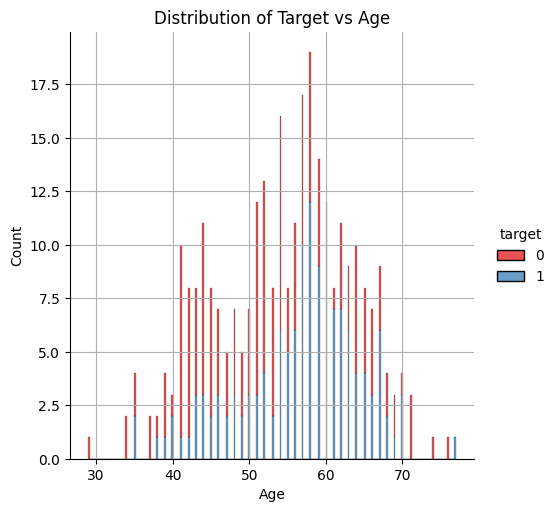

In [38]:
# Distribution of target vs age
plt.figure(figsize=(60, 100))
sns.displot(data=df, x='age', hue='target', multiple='stack', bins=200, palette='Set1')
plt.title('Distribution of Target vs Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

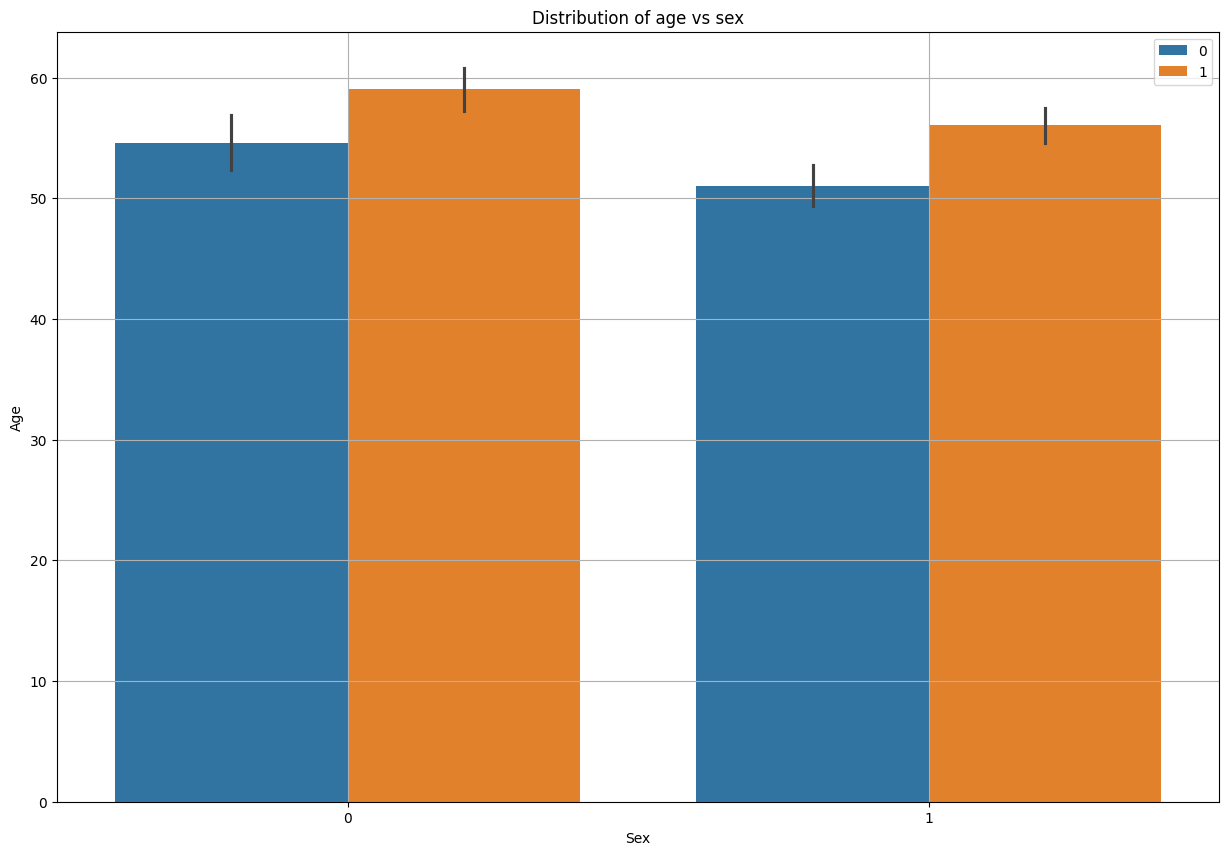

In [42]:
plt.figure(figsize=(, 10))
sns.barplot(data = df, x = 'sex', y = 'age', hue = 'target')
plt.title("Distribution of age vs sex")
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2, random_state = 42)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model_kNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto',
                             leaf_size = 30,
                             p = 2, metric = 'minkowski')
model_kNN.fit(x_train, y_train)

train_accuracy_kNN = model_kNN.score(x_train, y_train)
test_accuracy_kNN = model_kNN.score(x_test, y_test)

print(f'Train Accuracy for kNN: {train_accuracy_kNN}')
print(f'Test Accuracy for kNN: {test_accuracy_kNN}')

Train Accuracy for kNN: 0.756198347107438
Test Accuracy for kNN: 0.6885245901639344


In [63]:
from sklearn.svm import SVC
model_SVM = SVC(kernel='rbf', random_state=42)

model_SVM.fit(x_train, y_train)

train_accuracy_SVM = model_SVM.score(x_train, y_train)
test_accuracy_SVM = model_SVM.score(x_test, y_test)

print(f"Train Accuracy: {train_accuracy_SVM}")
print(f"Test Accuracy: {test_accuracy_SVM}")

Train Accuracy: 0.6611570247933884
Test Accuracy: 0.6721311475409836


In [66]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()

model_NB.fit(x_train, y_train)

train_accuracy_NB = model_NB.score(x_train, y_train)
test_accuracy_NB = model_NB.score(x_test, y_test)

print(f"Train Accuracy: {train_accuracy_NB}")
print(f"Test Accuracy: {test_accuracy_NB}")

Train Accuracy: 0.8471074380165289
Test Accuracy: 0.8360655737704918


In [69]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(criterion = 'gini',
                      max_depth = 10, min_samples_split = 2)

model_DT.fit(x_train, y_train)

train_accuracy_DT = model_DT.score(x_train, y_train)
test_accuracy_DT = model_DT.score(x_test, y_test)

print(f"Train Accuracy: {train_accuracy_DT}")
print(f"Test Accuracy: {test_accuracy_DT}")

Train Accuracy: 1.0
Test Accuracy: 0.7213114754098361


In [71]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(criterion = 'gini',
                      max_depth = 10, min_samples_split = 2,
                      n_estimators = 10, random_state = 42)

model_RF.fit(x_train, y_train)

train_accuracy_RF = model_RF.score(x_train, y_train)
test_accuracy_RF = model_RF.score(x_test, y_test)

print(f"Train Accuracy: {train_accuracy_RF}")
print(f"Test Accuracy: {test_accuracy_RF}")

Train Accuracy: 0.9834710743801653
Test Accuracy: 0.8032786885245902


In [78]:
from sklearn.ensemble import AdaBoostClassifier

model_ABoost = AdaBoostClassifier(n_estimators=50, learning_rate = 1.0)
model_ABoost.fit(x_train, y_train)

train_accuracy_ABoost = model_ABoost.score(x_train, y_train)
test_accuracy_ABoost = model_ABoost.score(x_test, y_test)

print(f"Train Accuracy: {train_accuracy_ABoost}")
print(f"Test Accuracy: {test_accuracy_ABoost}")

Train Accuracy: 0.9132231404958677
Test Accuracy: 0.8360655737704918


In [77]:
from sklearn.ensemble import GradientBoostingClassifier

model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                      subsample=1.0, min_samples_split=2,
                                      max_depth=3, random_state=42)
model_GB.fit(x_train, y_train)

train_accuracy_GB = model_GB.score(x_train, y_train)
test_accuracy_GB = model_GB.score(x_test, y_test)

print(f"Train Accuracy: {train_accuracy_GB}")
print(f"Test Accuracy: {test_accuracy_GB}")

Train Accuracy: 0.9958677685950413
Test Accuracy: 0.8524590163934426


In [80]:
from xgboost import XGBClassifier

model_XGBoost = XGBClassifier(objective = "binary:logistic", random_state = 42, n_estimators = 100)
model_XGBoost.fit(x_train, y_train)

train_accuracy_XGBoost = model_XGBoost.score(x_train, y_train)
test_accuracy_XGBoost = model_XGBoost.score(x_test, y_test)

print(f"Train Accuracy: {train_accuracy_XGBoost}")
print(f"Test Accuracy: {test_accuracy_XGBoost}")

Train Accuracy: 1.0
Test Accuracy: 0.8688524590163934


In [89]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gb = GradientBoostingClassifier(random_state = 42)
svc = SVC(kernel = 'rbf', random_state =42)
ad = AdaBoostClassifier(random_state = 42)
base_models = [
    ('knn', knn),
    ('svm', svc),
    ('dt', dtc),
    ('rf', rfc),
    ('aboost', ad),
    ('gb', gb),
    ('xgboost', xgb)
]


meta_learner = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Fit the stacking model
stacking_model.fit(x_train, y_train)

# Evaluate the stacking model
train_accuracy_stacking = stacking_model.score(x_train, y_train)
test_accuracy_stacking = stacking_model.score(x_test, y_test)

print(f"Train Accuracy (Stacking): {train_accuracy_stacking}")
print(f"Test Accuracy (Stacking): {test_accuracy_stacking}")

Train Accuracy (Stacking): 1.0
Test Accuracy (Stacking): 0.8852459016393442
